In [1]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=efc040c117dc6610e26c5cbf2e56bc45a433d8ff998bea1774536b1ea6979478
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62120 sha256=d881db717aeb10f59dcd384e3982ea4026678abb7230b7b521e7cb5f1afbc46b
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


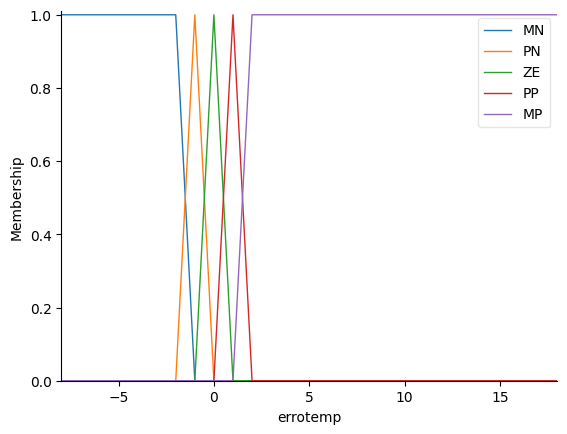

In [3]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 19, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
resfriador =ctrl.Consequent(np.arange(0, 100, 1), 'resfriador')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 18,18])
# You can see how these look with .view()
errotemp.view()

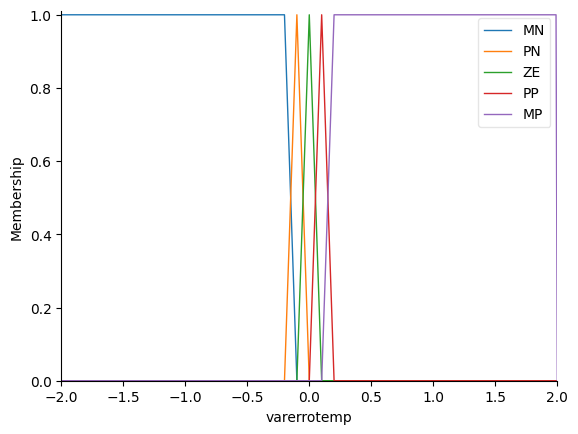

In [4]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])

# You can see how these look with .view()
varerrotemp.view()

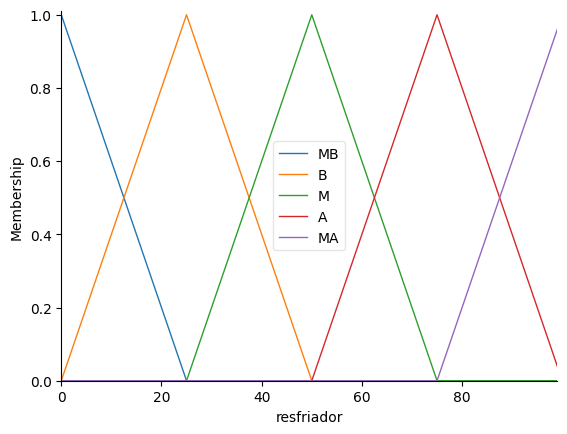

In [5]:
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0,0,25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0,25,50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])
resfriador.view()

In [6]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], resfriador['MB'])
regra4 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], resfriador['MB'])
regra5 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], resfriador['B'])
regra6 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], resfriador['B'])
regra7 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], resfriador['M'])
regra9 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], resfriador['M'])
regra10 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], resfriador['M'])
regra11 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['A'])
regra12 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], resfriador['A'])
regra13 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['A'])
regra17 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['A'])
regra18 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['MA'])
regra19 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])
regra21 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['MA'])
regra22 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra23 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['MA'])
regra24 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])

In [7]:
resfriador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
controle = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [11]:
from logging import setLogRecordFactory
#Parematros do sistema
entrada = int(input('Digite um modo de 1 a 3'))
setpoint = 0
if entrada == 1:
    setpoint = -2
elif entrada == 2:
    setpoint = -6
elif entrada == 3:
    setpoint = -8
else:
  print("Entrada invalida")

tempatual = 0
erroanterior= tempatual - setpoint

while True:
  controle.input['errotemp'] = erroanterior
  erroatual = tempatual - setpoint
  varerroTemp = erroatual - erroanterior

  controle.input['errotemp'] =  erroatual
  controle.input['varerrotemp'] = varerroTemp
  controle.compute()
  i=0
  while (i < 10):
    tempatual = tempatual * 0.9952 - 0.0003963 * controle.output['resfriador']
    time.sleep(1)
    i += 1

  print(f"Potência do resfriador: {controle.output['resfriador']}%")
  print(f"Sensor de temperatura: {tempatual} °C")
  print(f"Erro atual: {erroatual}")

  client.publish("resfriador/temperatura", tempatual)
  client.publish("resfriador/erro", erroatual)


Digite um modo de 1 a 32
Potência do resfriador: 66.01386623164765%
Sensor de temperatura: -0.25603383877183195 °C
Erro atual: 6
Potência do resfriador: 62.933187294633086%
Sensor de temperatura: -0.4880917703850087 °C
Erro atual: 5.743966161228168


KeyboardInterrupt: ignored